# Questionário 01

Essa atividade consiste na aplicação prática dos conceitos iniciais da disciplina SME0828 - Introdução à Ciência de Dados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Q.01

In [5]:
data_iris_error = pd.read_csv('data/iris-with-errors.csv', header=(0))

In [6]:
data_iris_error.replace('?', np.nan, inplace=True)
data_iris_error.drop_duplicates(inplace=True)
data_iris_error.dropna(inplace=True)

drop_columns = data_iris_error.columns[data_iris_error.shape[1]-2:data_iris_error.shape[1]]
data_iris_error.drop(drop_columns,axis=1, inplace=True)

data_iris_error

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


In [7]:
data_iris_error.shape

(14, 3)

## Q. 02

In [10]:
data_iris_error = pd.read_csv('data/iris-with-errors.csv', header=(0))

In [11]:
data_iris_error.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa


In [12]:
data_iris_error.replace('?', np.nan, inplace=True)

In [13]:
data_aux = data_iris_error.drop('species', axis=1)

In [14]:
data_aux = data_aux.astype('float')

In [15]:
data_aux.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,22.000000,24.000000,25.000000,23.000000
mean,5.022727,3.437500,1.440000,0.226087
std,0.447141,0.409467,0.141421,0.086431
min,4.300000,2.900000,1.100000,0.100000
25%,4.725000,3.075000,1.400000,0.200000
50%,5.050000,3.450000,1.400000,0.200000
75%,5.400000,3.725000,1.500000,0.250000
max,5.800000,4.400000,1.700000,0.400000


In [16]:
data_aux.fillna(data_aux.mean(), inplace=True)


In [17]:
data_aux.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.100000,3.5,1.4,0.2
1,5.100000,3.5,1.4,0.2
2,5.022727,3.0,1.4,0.2


In [18]:
medians = data_aux.median(axis=0)
medians

sepal_length    5.022727
sepal_width     3.437500
petal_length    1.400000
petal_width     0.200000
dtype: float64

## Q. 03

In [19]:
data_iris = pd.read_csv('data/iris.csv', header=(0))
data_iris.drop('species', axis=1, inplace=True)

In [20]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
data_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [67]:
Q1 = data_iris.quantile(0.25)
Q3 = data_iris.quantile(0.75)
IQR = Q3 - Q1

# Identificar os outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

outliers = ((data_iris < (Q1 - 1.5*IQR)) | (data_iris > (Q3 + 1.5*IQR))).any()

print("Outliers por coluna:")
print(outliers)

Outliers por coluna:
sepal_length    False
sepal_width      True
petal_length    False
petal_width     False
dtype: bool


<Axes: xlabel='sepal_width'>

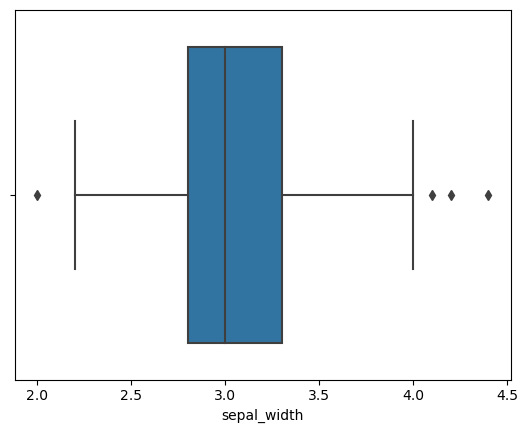

In [64]:
sns.boxplot(data=data_iris, x='sepal_width')

In [57]:
data_iris_error = pd.read_csv('data/iris-with-errors.csv', header=(0))

In [59]:
data_iris_error.drop('species',axis=1, inplace=True)

<Axes: >

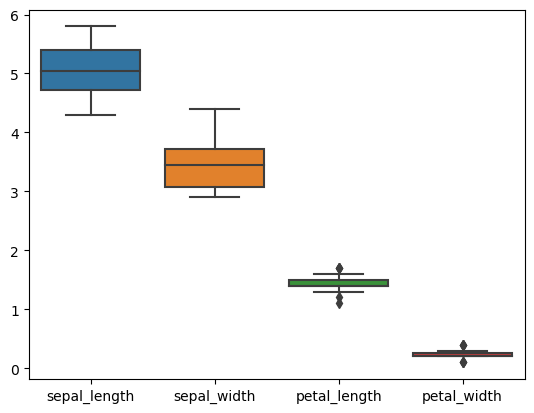

In [61]:
data_iris_error.replace('?', np.nan, inplace=True)
data_iris_error = data_iris_error.astype('float')
sns.boxplot(data=data_iris_error)

In [62]:
Q1 = data_iris_error.quantile(0.25)
Q3 = data_iris_error.quantile(0.75)
IQR = Q3 - Q1

# Identificar os outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data_iris_error < lower_bound) | (data_iris_error > upper_bound)).any()

print("Outliers por coluna:")
print(outliers)

Outliers por coluna:
sepal_length    False
sepal_width     False
petal_length     True
petal_width      True
dtype: bool


## Q. 04


In [42]:
data_titanic = pd.read_csv('data/titanic/train.csv', header=(0))

In [34]:
# data_titanic.drop('Unnamed: 32',axis=1, inplace=True)

In [43]:
data_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
corr = data_titanic.corr()

/tmp/ipykernel_3703/1549474140.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_titanic.corr()


In [45]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


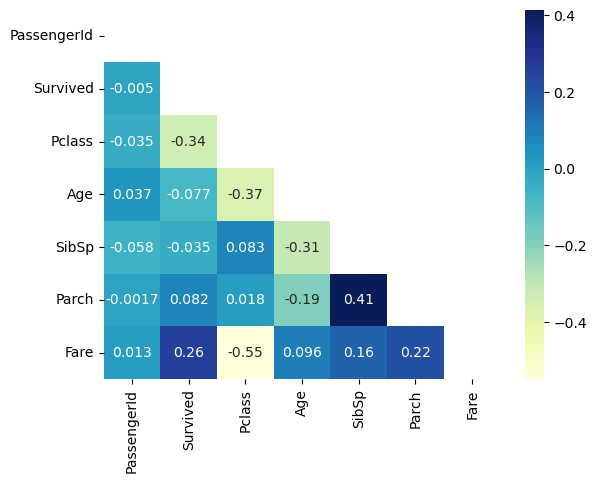

In [48]:
mask = np.triu(np.ones_like(corr))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=mask)

plt.show()

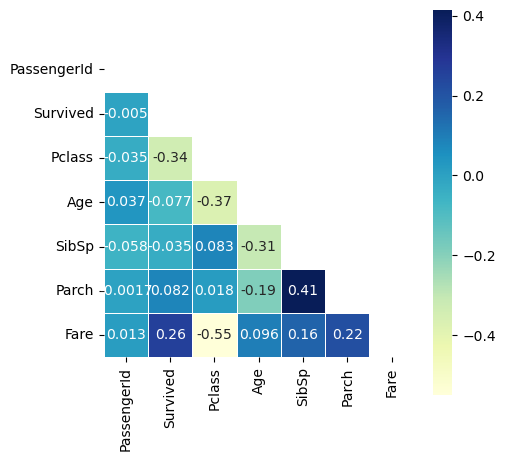

In [51]:
plt.subplots(figsize=(5, 5))
ax = sns.heatmap(corr, 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True,
                 mask=mask
                )